In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score 

## Predicting heart disease using ML
### 1-Problem definition
### 2-Data 
### 3-Evaluation
### 4-Features
### 5-Modelling
### 6-Experimentation

In [36]:
df=pd.read_csv("hear_disease_project.csv")
df.shape

(303, 14)

In [37]:
"""
 Data exploration
1-What questions are you trying to solve?
2-What kind of data do we have and how do we treat different types?
3-What's missing from the data and how do you deal with it ?
4-Where are the outliers and why should you care about them?
5-How can you add,change or remove features to get more out of your data?

"""
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

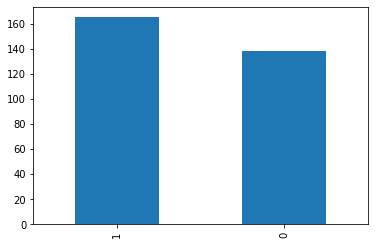

In [38]:
df["target"].value_counts().plot(kind="bar")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [40]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

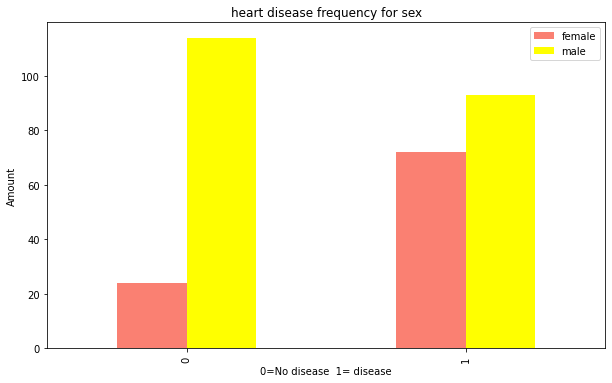

In [43]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","yellow"],figsize=(10,6))
plt.title("heart disease frequency for sex")
plt.xlabel("0=No disease  1= disease")
plt.ylabel("Amount")
plt.legend(["female","male"]);

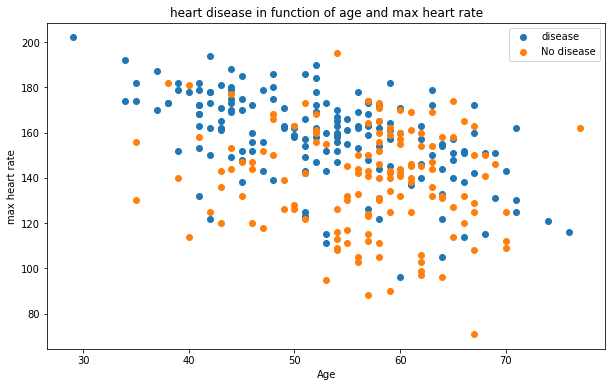

In [49]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1])
plt.scatter(df.age[df.target==0],df.thalach[df.target==0])

plt.title("heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.legend(["disease","No disease"]);

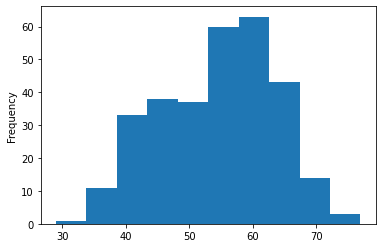

In [51]:
df.age.plot.hist();

In [53]:
# Make a correlation matrix 
# Check out, what is a correlation matrix 
corr_matrix=df.corr()

(14.5, -0.5)

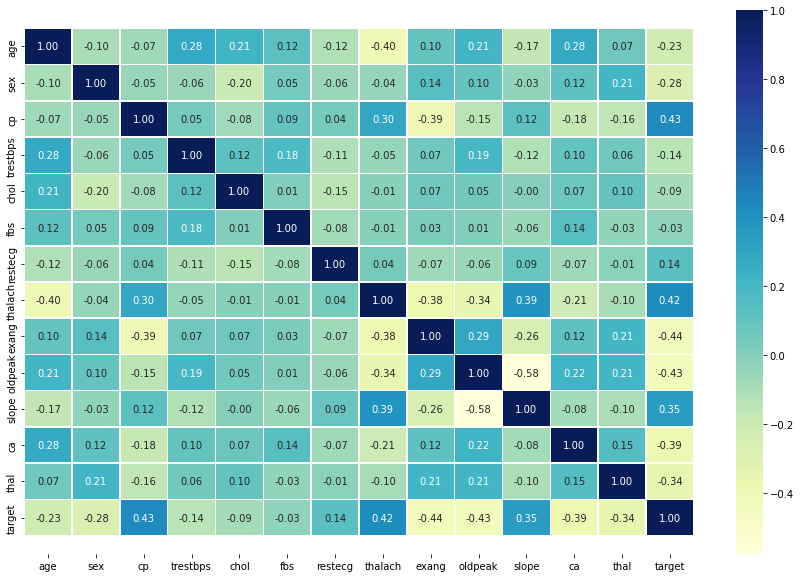

In [60]:
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

## 5-Modelling

In [62]:
# Split data
X=df.drop("target",axis=1)
y=df["target"]

np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [63]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [65]:
"""
Three models we are going to try 
1-LogisticRegression
2-RandomForestClassifier
3-KNeighborsClassifier

"""
models={"Logistic Regression":LogisticRegression(),
 "Random Forest Classifier":RandomForestClassifier(),
"KNeighborsClassifier":KNeighborsClassifier()}

def fit_and_evaluate(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given ML models
    """
    np.random.seed(42)
    model_scores={}

    for name,model in models.items():
        model.fit(X_train,y_train)

        model_scores[name]=model.score(X_test,y_test)
    return model_scores    
    

In [67]:
models_scores=fit_and_evaluate(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
models_scores

{'Logistic Regression': 0.8852459016393442,
 'Random Forest Classifier': 0.8360655737704918,
 'KNeighborsClassifier': 0.6885245901639344}

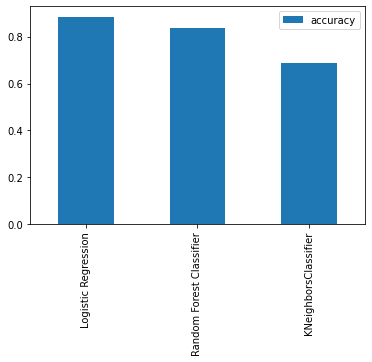

In [77]:
model_compare=pd.DataFrame(models_scores,index=["accuracy"])
model_compare.T.plot(kind="bar");

Now we have got a baseline model... and we know a model's first predictions aren't always what we should based our next steps

Let's look at the following:
* Hyperparameter tuning with
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)
 ### Hyperparameter tuning

### -------KNN-------

In [78]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Max knn score : %75.41


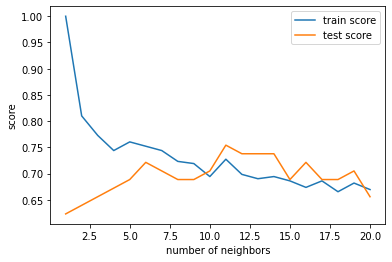

In [88]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xlabel("number of neighbors")
plt.ylabel("score")
plt.legend();
print(f"Max knn score : %{max(test_scores)*100:.2f}")

### Tuning with RandomizedSearchCV
* Logistic
* Randomforest

In [97]:
#---For logistic regression---

log_req_grid={"C":np.logspace(-4,4,20),
            "solver":["liblinear"]}

#---For RandomForestClassifier---
rf_grids={"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}            

### --Tuning logistic regression--

In [94]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
param_distributions=log_req_grid,
cv=5,
n_iter=20,
verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [95]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [96]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### --Tuning RandomForestClassifier regression--

In [98]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
param_distributions=rf_grids,
n_iter=20,cv=5,verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [100]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [101]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### Tuning with GridSearchCV
* Since our LogisticRegressino model provides the best scores so far,we'll try and improve them again using GridSearchCV

#### -------------LogisticRegression-------------

In [103]:
gs_loq_reg=GridSearchCV(LogisticRegression(),param_grid=log_req_grid,
cv=5,verbose=True)

gs_loq_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [105]:
gs_loq_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [106]:
gs_loq_reg.score(X_test, y_test)

0.8852459016393442

#### -------------RandomForestClassifier-------------


In [ ]:
rf_log_reg=GridSearchCV(RandomForestClassifier(),param_grid=rf_grids,
cv=5,verbose=True)

rf_log_reg.fit(X_train,y_train)

rf_log_reg.best_params_

### Evaluating our tuned ML classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* precision
* Recall
* F1 score

In [111]:
y_preds=gs_loq_reg.predict(X_test)
a=pd.DataFrame({"y_preds":y_preds, "true values":y_test})
a

,y_preds,true values
179,0,0
228,1,0
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


ROC

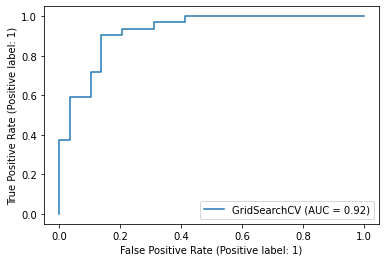

In [113]:
plot_roc_curve(gs_loq_reg,X_test,y_test)

Confusion Matrix

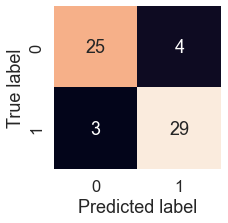

In [117]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Classification report

In [123]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics usin cross-validation
cross_val_score()

In [124]:
gs_loq_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [166]:
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")


def cross_validation_values(X,y):
    #Accuracy 
    cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
    #Precision
    cv_prec=cross_val_score(clf,X,y,cv=5,scoring="precision")
    #Recall
    cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
    #F1 score
    cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
    scores=[cv_acc,cv_prec,cv_recall,cv_f1]
    b=pd.DataFrame({"cv_acc":scores[0], "cv_prec":scores[1], "cv_recall":scores[2], "cv_f1":scores[3]})
    b.T.plot.bar(title="Cross_validation score",legend=False)




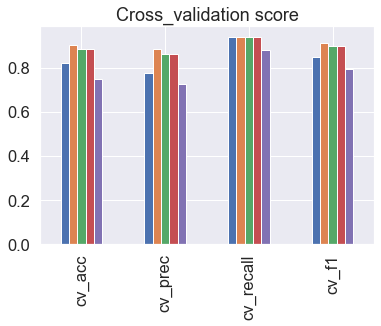

In [167]:
cross_validation_values(X,y)

## Feature Importance
* Which features contributed most of to the outcomes of the model and how did they contribute?
* One way to find feature importance is to search for {MODEL_NAME} feature importance

In [169]:
# Fit and instance of Logistic regression
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [172]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490196,  0.02472938, -0.63120405, -0.57590944,
         0.47095136, -0.65165348, -0.69984207]])

In [173]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0]))) 
feature_dict

{'age': 0.0036992204263316046,
 'sex': -0.9042408956887139,
 'cp': 0.6747282615160669,
 'trestbps': -0.011613401783321394,
 'chol': -0.0017036440482812683,
 'fbs': 0.04787688252047295,
 'restecg': 0.33490195947970397,
 'thalach': 0.024729383248315095,
 'exang': -0.6312040531278076,
 'oldpeak': -0.5759094351419909,
 'slope': 0.47095136460993287,
 'ca': -0.6516534822561492,
 'thal': -0.6998420667519071}

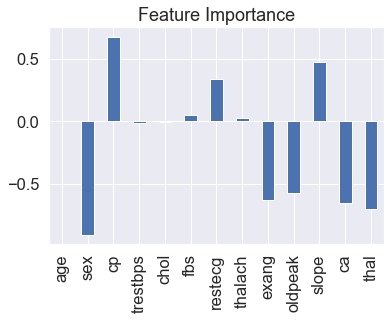

In [176]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

## 6-Experimentation
If you haven't hit your evaluation metric yet... ask yourself..
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we have done so far)
* If your model is good enough, how would you export it share it with others?